# Machine Learning

## Linear Regression models

### Jorge de Toro, Juan A. Ortíz

### Predicción series temporales by month

Realizamos el experimento agrupando las ventas por mes. Una vez tengamos los resultados realizaremos el experimento con un conjunto de datos a dia y compararemos los resultados de todos los modelos.

In [1]:
# Importamos todos los módulos necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

#modelos Regresión Lineal y Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

#medidas de error
from sklearn.metrics import mean_squared_error, confusion_matrix
from math import sqrt

In [2]:
df =pd.DataFrame()
df = pd.read_csv('C:/Users/txico/El Corte Inglés, S.A/Otb y el master - Documentos/VentaMes2017-2019.csv'
                 ,';',index_col='Fecha Venta',parse_dates=True)

In [3]:
#Convertimos el índice en fecha
df.index = pd.to_datetime(df.index)
print(df.head())
df.info()

#df['Año'] = df.index.year
#df['Mes'] = df.index.month
#df['Dia'] = df.index.day_name()
#df['Semana'] =df.index.week

             Unidades Vendidas
Fecha Venta                   
2017-01-01               94158
2017-02-01               30152
2017-03-01               38901
2017-04-01               58229
2017-05-01               59880
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2017-01-01 to 2019-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unidades Vendidas  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


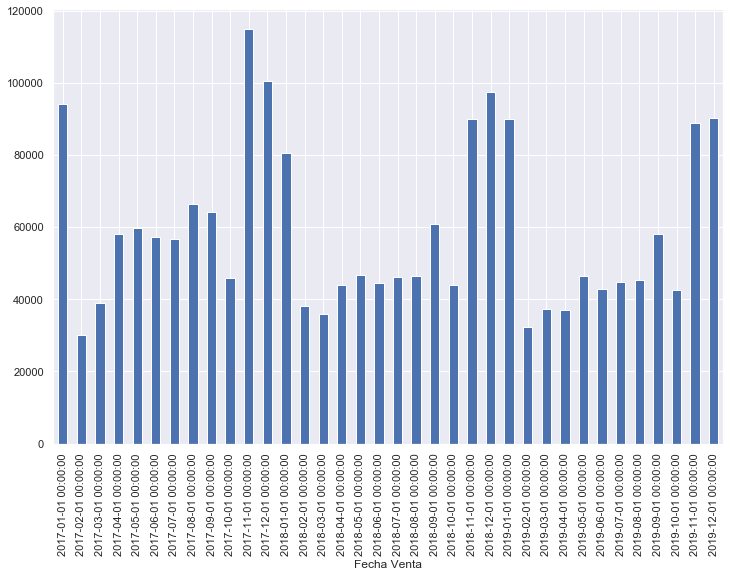

In [4]:
sbn.set(rc={'figure.figsize':(10, 5)})
df['Unidades Vendidas'].plot(figsize=(12,8),kind='bar')
#ax = df['Unidades Vendidas'].plot(marker='.', alpha=0.1, linestyle='None', figsize=(10,10), subplots=True)

In [5]:
df['Sale_LastMonth'] = df['Unidades Vendidas'].shift(+1)
df['Sale_2Monthsback'] = df['Unidades Vendidas'].shift(+2)
df['Sale_3Monthsback'] = df['Unidades Vendidas'].shift(+3)
df['Sale_4Monthsback'] = df['Unidades Vendidas'].shift(+4)
df['Sale_5Monthsback'] = df['Unidades Vendidas'].shift(+5)
df['Sale_6Monthsback'] = df['Unidades Vendidas'].shift(+6)
df['Sale_7Monthsback'] = df['Unidades Vendidas'].shift(+7)
df['Sale_8Monthsback'] = df['Unidades Vendidas'].shift(+8)
df['Sale_9Monthsback'] = df['Unidades Vendidas'].shift(+9)
df['Sale_10Monthsback'] = df['Unidades Vendidas'].shift(+10)
df['Sale_11Monthsback'] = df['Unidades Vendidas'].shift(+11)
df['Sale_12Monthsback'] = df['Unidades Vendidas'].shift(+12)


df.head(10)

,Unidades Vendidas,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback,Sale_4Monthsback,Sale_5Monthsback,Sale_6Monthsback,Sale_7Monthsback,Sale_8Monthsback,Sale_9Monthsback,Sale_10Monthsback,Sale_11Monthsback,Sale_12Monthsback
Fecha Venta,,,,,,,,,,,,,
2017-01-01,94158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,30152,94158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,38901,30152.0,94158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-01,58229,38901.0,30152.0,94158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,59880,58229.0,38901.0,30152.0,94158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,57168,59880.0,58229.0,38901.0,30152.0,94158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,56861,57168.0,59880.0,58229.0,38901.0,30152.0,94158.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,66329,56861.0,57168.0,59880.0,58229.0,38901.0,30152.0,94158.0,NaN,NaN,NaN,NaN,NaN
2017-09-01,64198,66329.0,56861.0,57168.0,59880.0,58229.0,38901.0,30152.0,94158.0,NaN,NaN,NaN,NaN


In [6]:
df=df.dropna()
df

,Unidades Vendidas,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback,Sale_4Monthsback,Sale_5Monthsback,Sale_6Monthsback,Sale_7Monthsback,Sale_8Monthsback,Sale_9Monthsback,Sale_10Monthsback,Sale_11Monthsback,Sale_12Monthsback
Fecha Venta,,,,,,,,,,,,,
2018-01-01,80549,100580.0,114898.0,45831.0,64198.0,66329.0,56861.0,57168.0,59880.0,58229.0,38901.0,30152.0,94158.0
2018-02-01,38136,80549.0,100580.0,114898.0,45831.0,64198.0,66329.0,56861.0,57168.0,59880.0,58229.0,38901.0,30152.0
2018-03-01,36001,38136.0,80549.0,100580.0,114898.0,45831.0,64198.0,66329.0,56861.0,57168.0,59880.0,58229.0,38901.0
2018-04-01,43879,36001.0,38136.0,80549.0,100580.0,114898.0,45831.0,64198.0,66329.0,56861.0,57168.0,59880.0,58229.0
2018-05-01,46627,43879.0,36001.0,38136.0,80549.0,100580.0,114898.0,45831.0,64198.0,66329.0,56861.0,57168.0,59880.0
2018-06-01,44648,46627.0,43879.0,36001.0,38136.0,80549.0,100580.0,114898.0,45831.0,64198.0,66329.0,56861.0,57168.0
2018-07-01,46304,44648.0,46627.0,43879.0,36001.0,38136.0,80549.0,100580.0,114898.0,45831.0,64198.0,66329.0,56861.0
2018-08-01,46556,46304.0,44648.0,46627.0,43879.0,36001.0,38136.0,80549.0,100580.0,114898.0,45831.0,64198.0,66329.0
2018-09-01,61019,46556.0,46304.0,44648.0,46627.0,43879.0,36001.0,38136.0,80549.0,100580.0,114898.0,45831.0,64198.0


In [7]:
lin_model=LinearRegression()

In [8]:
#convertimos el dataframe en una matriz
x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y = df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Sale_4Monthsback'],df['Sale_5Monthsback'],df['Sale_6Monthsback'],df['Sale_7Monthsback'],df['Sale_8Monthsback'],df['Sale_9Monthsback'],df['Sale_10Monthsback'],df['Sale_11Monthsback'],df['Sale_12Monthsback'],df['Unidades Vendidas']

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5),np.array(x6),np.array(x7),np.array(x8),np.array(x9),np.array(x10),np.array(x11),np.array(x12),np.array(y)

x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1),x6.reshape(-1,1),x7.reshape(-1,1),x8.reshape(-1,1),x9.reshape(-1,1),x10.reshape(-1,1),x11.reshape(-1,1),x12.reshape(-1,1),y.reshape(-1,1)

final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12),axis=1)

print(final_x)

print(final_x.shape)



[[100580. 114898.  45831.  64198.  66329.  56861.  57168.  59880.  58229.
   38901.  30152.  94158.]
 [ 80549. 100580. 114898.  45831.  64198.  66329.  56861.  57168.  59880.
   58229.  38901.  30152.]
 [ 38136.  80549. 100580. 114898.  45831.  64198.  66329.  56861.  57168.
   59880.  58229.  38901.]
 [ 36001.  38136.  80549. 100580. 114898.  45831.  64198.  66329.  56861.
   57168.  59880.  58229.]
 [ 43879.  36001.  38136.  80549. 100580. 114898.  45831.  64198.  66329.
   56861.  57168.  59880.]
 [ 46627.  43879.  36001.  38136.  80549. 100580. 114898.  45831.  64198.
   66329.  56861.  57168.]
 [ 44648.  46627.  43879.  36001.  38136.  80549. 100580. 114898.  45831.
   64198.  66329.  56861.]
 [ 46304.  44648.  46627.  43879.  36001.  38136.  80549. 100580. 114898.
   45831.  64198.  66329.]
 [ 46556.  46304.  44648.  46627.  43879.  36001.  38136.  80549. 100580.
  114898.  45831.  64198.]
 [ 61019.  46556.  46304.  44648.  46627.  43879.  36001.  38136.  80549.
  100580. 114898.

In [22]:
# separamos el conjunto en dos : parte de entrenamiento y parte test

X_train,X_test,y_train,y_test=final_x[:-12],final_x[-12:],y[:-12],y[-12:]

In [23]:
# entrenamos el modelo
lin_model.fit(X_train,y_train)
print('w = ' +str(lin_model.coef_) + ', b = ' + str(lin_model.intercept_))

w = [[ 0.16274412 -0.21207972 -0.06291911 -0.04008151 -0.19840011 -0.11264593
  -0.14705849 -0.16398456 -0.23945904 -0.01466334 -0.28943094  0.5501877 ]], b = [103232.03516259]


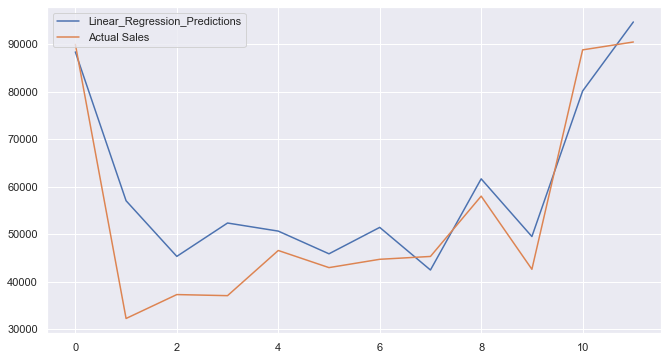

In [24]:
# una vez entrenado, predecimos la parte test
lin_pred=lin_model.predict(X_test)

sbn.set(rc={'figure.figsize':(11, 6)})
#plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [25]:
# utilizamos el error cuadrático medio como medida de error.
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [26]:
lin_pred

array([[88360.7730223 ],
       [57057.33075583],
       [45355.29773131],
       [52372.02748445],
       [50672.98293164],
       [45897.37742568],
       [51453.7529278 ],
       [42488.92247559],
       [61664.78879012],
       [49527.88671349],
       [80135.27369102],
       [94662.22046221]])

In [27]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 9769.170355700204


## Random Forest

Utilizamos el mismo conjunto de datos con las variaciones 
hechas para el modelo de regresión lineal

In [28]:
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [29]:
# entrenamiento Random Forest
print(model.fit(X_train,y_train))
model.score(X_test, y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.5925074317005402

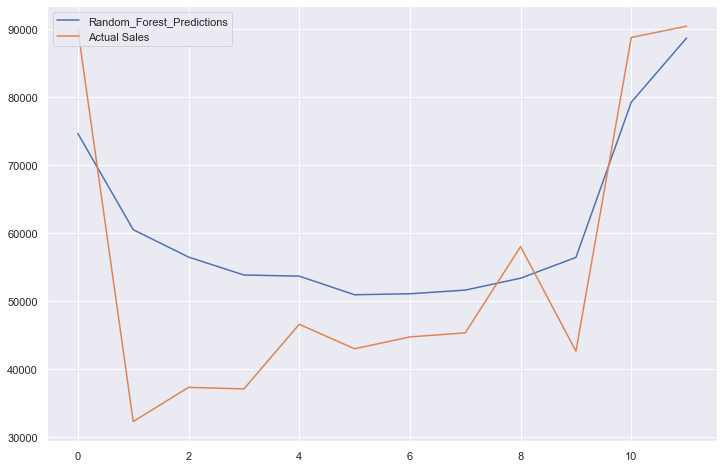

In [30]:
pred=model.predict(X_test)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [31]:
rmse_rf=sqrt(mean_squared_error(pred,y_test))
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 13469.914352222759


### Predicción series temporales by date

Realizamos el experimento a día. Utilizaremos los años 2017, 2018 y 2019.

#### Linear Regression

In [2]:
# Importamos todos los módulos necesarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#modelos Regresión Lineal y Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller

#medidas de error
from sklearn.metrics import mean_squared_error, confusion_matrix
from math import sqrt

Matplotlib is building the font cache; this may take a moment.


In [3]:
df =pd.DataFrame()
df = pd.read_csv('C:/Users/67075622/El Corte Inglés, S.A/Otb y el master - Documentos/VentaDia 2017-2019.csv'
                 ,';',index_col='Fecha Venta',parse_dates=True)

In [4]:
#Convertimos el índice en fecha
df.index = pd.to_datetime(df.index)
print(df.head())
df.info()

             Unidades Vendidas
Fecha Venta                   
2018-01-01               644.0
2018-02-01              7295.0
2018-03-01              4751.0
2018-04-01              6828.0
2018-05-01              4866.0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1095 entries, 2018-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unidades Vendidas  1095 non-null   float64
dtypes: float64(1)
memory usage: 17.1 KB


In [5]:
#bucle para convertir pasos anteriores de tiempo
valor = 1
    
for sale in range(1,31):
    df['Sale_LastDay'+str(valor)] = df['Unidades Vendidas'].shift(valor)
    valor = valor +1
    

df=df.dropna()
df.head(10)

,Unidades Vendidas,Sale_LastDay1,Sale_LastDay2,Sale_LastDay3,Sale_LastDay4,Sale_LastDay5,Sale_LastDay6,Sale_LastDay7,Sale_LastDay8,Sale_LastDay9,...,Sale_LastDay21,Sale_LastDay22,Sale_LastDay23,Sale_LastDay24,Sale_LastDay25,Sale_LastDay26,Sale_LastDay27,Sale_LastDay28,Sale_LastDay29,Sale_LastDay30
Fecha Venta,,,,,,,,,,,,,,,,,,,,,
2018-01-31,2775.0,5001.0,4199.0,4406.0,1719.0,1676.0,1803.0,962.0,2379.0,1860.0,...,878.0,1943.0,2203.0,2536.0,596.0,4866.0,6828.0,4751.0,7295.0,644.0
2018-01-02,4623.0,2775.0,5001.0,4199.0,4406.0,1719.0,1676.0,1803.0,962.0,2379.0,...,1946.0,878.0,1943.0,2203.0,2536.0,596.0,4866.0,6828.0,4751.0,7295.0
2018-02-02,1235.0,4623.0,2775.0,5001.0,4199.0,4406.0,1719.0,1676.0,1803.0,962.0,...,1891.0,1946.0,878.0,1943.0,2203.0,2536.0,596.0,4866.0,6828.0,4751.0
2018-03-02,1188.0,1235.0,4623.0,2775.0,5001.0,4199.0,4406.0,1719.0,1676.0,1803.0,...,1818.0,1891.0,1946.0,878.0,1943.0,2203.0,2536.0,596.0,4866.0,6828.0
2018-04-02,2545.0,1188.0,1235.0,4623.0,2775.0,5001.0,4199.0,4406.0,1719.0,1676.0,...,1852.0,1818.0,1891.0,1946.0,878.0,1943.0,2203.0,2536.0,596.0,4866.0
2018-05-02,2368.0,2545.0,1188.0,1235.0,4623.0,2775.0,5001.0,4199.0,4406.0,1719.0,...,2019.0,1852.0,1818.0,1891.0,1946.0,878.0,1943.0,2203.0,2536.0,596.0
2018-06-02,2980.0,2368.0,2545.0,1188.0,1235.0,4623.0,2775.0,5001.0,4199.0,4406.0,...,2895.0,2019.0,1852.0,1818.0,1891.0,1946.0,878.0,1943.0,2203.0,2536.0
2018-07-02,1543.0,2980.0,2368.0,2545.0,1188.0,1235.0,4623.0,2775.0,5001.0,4199.0,...,1273.0,2895.0,2019.0,1852.0,1818.0,1891.0,1946.0,878.0,1943.0,2203.0
2018-08-02,2164.0,1543.0,2980.0,2368.0,2545.0,1188.0,1235.0,4623.0,2775.0,5001.0,...,2257.0,1273.0,2895.0,2019.0,1852.0,1818.0,1891.0,1946.0,878.0,1943.0


In [6]:
#hacemos instancia al modelo de Regresión lineal
lin_model=LinearRegression()

In [7]:
#guardamos columnas en variables
x1,x2,x3,x4,x5,= df['Sale_LastDay1'], df['Sale_LastDay2'], df['Sale_LastDay3'],df['Sale_LastDay4'],df['Sale_LastDay5']
x6,x7,x8,x9,x10,x11 = df['Sale_LastDay6'], df['Sale_LastDay7'], df['Sale_LastDay8'],df['Sale_LastDay9'],df['Sale_LastDay10'],df['Sale_LastDay11']
x12,x13,x14,x15,x16 = df['Sale_LastDay12'],df['Sale_LastDay13'],df['Sale_LastDay14'],df['Sale_LastDay15'],df['Sale_LastDay16']
x17,x18,x19,x20,x21 = df['Sale_LastDay17'],df['Sale_LastDay18'],df['Sale_LastDay19'],df['Sale_LastDay20'],df['Sale_LastDay21']
x22,x23,x24,x25,x26 = df['Sale_LastDay22'],df['Sale_LastDay23'],df['Sale_LastDay24'],df['Sale_LastDay25'],df['Sale_LastDay26']
x27,x28,x29,x30,y = df['Sale_LastDay27'],df['Sale_LastDay28'],df['Sale_LastDay29'],df['Sale_LastDay30'],df['Unidades Vendidas']

#convertimos las variables en arrays
x1,x2,x3,x4,x5,=np.array(x1),np.array(x2),np.array(x3),np.array(x4),np.array(x5)
x6,x7,x8,x9,x10,x11 =np.array(x6),np.array(x7),np.array(x8),np.array(x9),np.array(x10),np.array(x11)
x12,x13,x14,x15,x16 = np.array(x12),np.array(x13),np.array(x14),np.array(x15),np.array(x16),
x17,x18,x19,x20,x21 = np.array(x17),np.array(x18),np.array(x19),np.array(x20),np.array(x21),
x22,x23,x24,x25,x26 = np.array(x22),np.array(x23),np.array(x24),np.array(x25),np.array(x26),
x27,x28,x29,x30,y = np.array(x27),np.array(x28),np.array(x29),np.array(x30),np.array(y)

x1,x2,x3,x4,x5,=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x4.reshape(-1,1),x5.reshape(-1,1)
x6,x7,x8,x9,x10,x11 =x6.reshape(-1,1),x7.reshape(-1,1),x8.reshape(-1,1),x9.reshape(-1,1),x10.reshape(-1,1),x11.reshape(-1,1)
x12,x13,x14,x15,x16 = x12.reshape(-1,1),x13.reshape(-1,1),x14.reshape(-1,1),x15.reshape(-1,1),x16.reshape(-1,1),
x17,x18,x19,x20,x21 = x17.reshape(-1,1),x18.reshape(-1,1),x19.reshape(-1,1),x20.reshape(-1,1),x21.reshape(-1,1),
x22,x23,x24,x25,x26 = x22.reshape(-1,1),x23.reshape(-1,1),x24.reshape(-1,1),x25.reshape(-1,1),x26.reshape(-1,1),
x27,x28,x29,x30,y = x27.reshape(-1,1),x28.reshape(-1,1),x29.reshape(-1,1),x30.reshape(-1,1),y.reshape(-1,1)

#creamos la matriz
final_x=np.concatenate((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30),axis=1)                                                                                                           

print(final_x)

print(final_x.shape)

[[5001. 4199. 4406. ... 4751. 7295.  644.]
 [2775. 5001. 4199. ... 6828. 4751. 7295.]
 [4623. 2775. 5001. ... 4866. 6828. 4751.]
 ...
 [5447. 5051. 4592. ... 1877. 1239.  879.]
 [5399. 5447. 5051. ... 2699. 1877. 1239.]
 [5658. 5399. 5447. ... 1031. 2699. 1877.]]
(1065, 30)


In [8]:
# conjunto de entrenamiento y conjunto de test

X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]
print(len(X_train))

1035


In [9]:
# model.fit(X_train,y_train)
print (lin_model.fit(X_train,y_train))

print('w = ' + str(lin_model.coef_) + ', b = ' + str(lin_model.intercept_))

LinearRegression()
w = [[ 0.65758834 -0.02928885 -0.00089176 -0.03392092 -0.00344362 -0.04184249
   0.17728743 -0.13709328  0.02222041  0.00756356  0.0283364   0.00776437
  -0.1004556   0.20307613 -0.08721084  0.06487147  0.02206896 -0.10256064
   0.04524005  0.02352688  0.11846931 -0.11669712  0.03787877 -0.00596099
  -0.00277719 -0.02070455  0.03917846  0.08043865 -0.0605371   0.00627679]], b = [361.56791219]


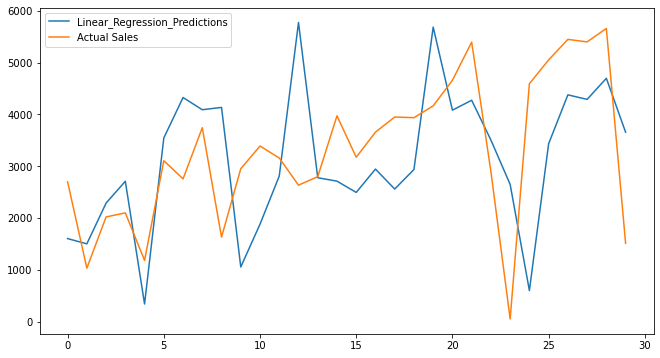

In [10]:
#Regresión lineal predicción

lin_pred=lin_model.predict(X_test)

plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")

plt.show()

In [11]:
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 1532.245526220537


#### Random Forest

In [20]:
#hacemos instancia al modelo de Random Forest

model = RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)


In [21]:
#entrenamiento Random Forest

print(model.fit(X_train, y_train))
model.score(X_test, y_test)

<ipython-input-21-05eae3cf5b21>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  print(model.fit(X_train, y_train))


RandomForestRegressor(max_features=3, random_state=1)


0.3461007115528014

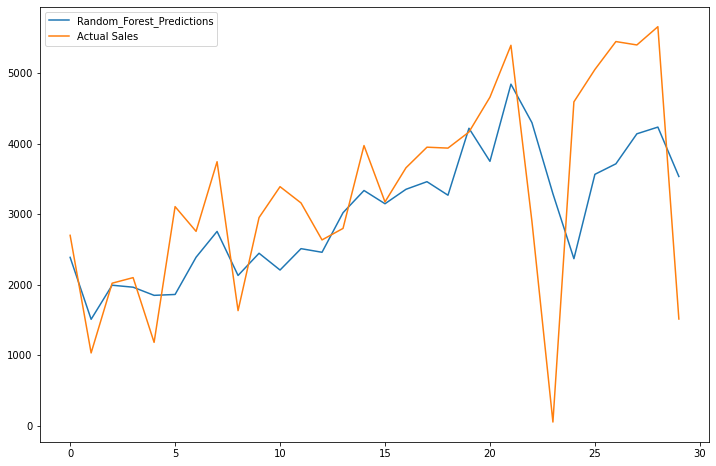

In [22]:
#Random Forest prediction

pred=model.predict(X_test)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")

plt.show()

In [23]:
#medidas de error para ver la bondad del modelo

rmse_rf=sqrt(mean_squared_error(pred,y_test))
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 1132.711152162295


In [24]:
#modificamos el nº de árboles

model2 = RandomForestRegressor(n_estimators=1000,max_features=3, random_state=1)

In [25]:
#entrenamiento Random Forest

print(model2.fit(X_train, y_train))
model2.score(X_test, y_test)

<ipython-input-25-48005602efb6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  print(model2.fit(X_train, y_train))


RandomForestRegressor(max_features=3, n_estimators=1000, random_state=1)


0.2661902197150925

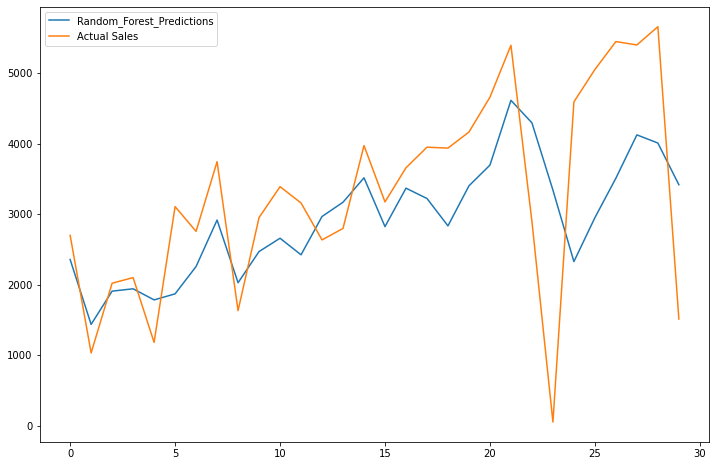

In [28]:
#Random Forest prediction

pred2=model2.predict(X_test)

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")

plt.show()

In [29]:
#medidas de error para ver la bondad del modelo

rmse_rf=sqrt(mean_squared_error(pred2,y_test))
print('Mean Squared Error for Random Forest Model is:',rmse_rf)

Mean Squared Error for Random Forest Model is: 1199.9288407649904
